# Atividade KMeans

Rhenan Dias Morais - GU3009254

In [110]:
import seaborn as sns
import pandas as pd

In [111]:
iris = sns.load_dataset('iris')

In [112]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [113]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

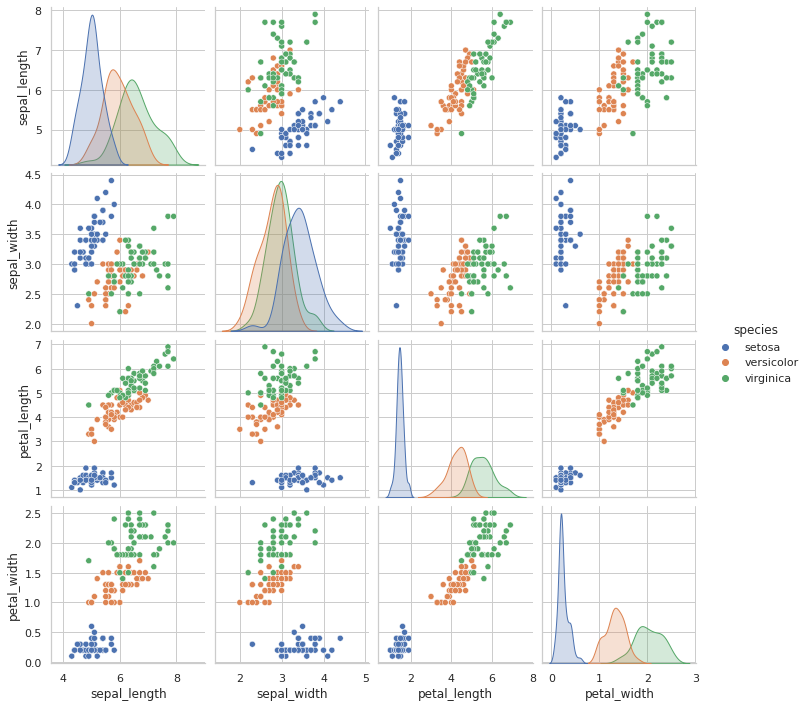

In [114]:
sns.set(style='whitegrid', context='notebook')
cols = iris.columns
sns.pairplot(iris, height=2.5, hue="species")
plt.show()

In [115]:
iris['species_int'] = pd.Categorical(iris['species']).codes

In [116]:
df = iris[["petal_width", "petal_length", "species_int"]]

In [117]:
df

,petal_width,petal_length,species_int
0,0.2,1.4,0
1,0.2,1.4,0
2,0.2,1.3,0
3,0.2,1.5,0
4,0.2,1.4,0
...,...,...,...
145,2.3,5.2,2
146,1.9,5.0,2
147,2.0,5.2,2
148,2.3,5.4,2


In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [119]:
scalar = StandardScaler()

In [120]:
scalar_caracteristicas = scalar.fit_transform(df)

## Chamando Classe de Kmeans

In [121]:
kmeans = KMeans(init='random',n_clusters=3,n_init=20,max_iter=800,random_state=56)

In [122]:
kmeans.fit(scalar_caracteristicas)

KMeans(init='random', max_iter=800, n_clusters=3, n_init=20, random_state=56)

A Inertia corresponde ao somatório dos erros quadráticos das instâncias de cada cluster. 


In [123]:
kmeans.inertia_

19.461802626212858

Plotando o gŕafico de Kmeans

(-2.0, 3.0)

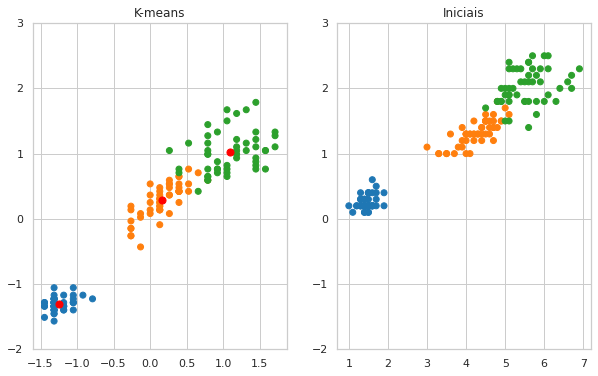

In [164]:
kmeans.cluster_centers_

f, (eixo1, eixo2) = plt.subplots(1, 2, sharey=False, figsize=(10,6))

colors = {0:'tab:blue', 1:'tab:orange', 2:'tab:green'}

eixo1.set_title('K-means')
eixo1.scatter(scalar_caracteristicas[:,0], scalar_caracteristicas[:,1],c=df['species_int'].map(colors))
eixo1.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='red', label='Centroides')
eixo1.set_ylim([-2, 3])
                
eixo2.set_title('Iniciais')
eixo2.scatter(df["petal_length"], df["petal_width"],c=df['species_int'].map(colors))
eixo2.set_ylim([-2, 3])

In [165]:
from sklearn.metrics import confusion_matrix, classification_report

In [169]:
print(confusion_matrix(df["species_int"], kmeans.labels_))

[[ 0 50  0]
 [ 0  0 50]
 [50  0  0]]


In [171]:
print(classification_report(df["species_int"], kmeans.labels_))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      50.0
           1       0.00      0.00      0.00      50.0
           2       0.00      0.00      0.00      50.0

    accuracy                           0.00     150.0
   macro avg       0.00      0.00      0.00     150.0
weighted avg       0.00      0.00      0.00     150.0



In [172]:
kmeans_valores = {
    'init':'random',
    'n_init':10,
    'max_iter':300,
    'random_state':56,
}

In [173]:
SER=[]
for k in range (1,11):
    kmeansCT = KMeans(n_clusters=k, **kmeans_valores)
    kmeansCT.fit(scalar_caracteristicas)
    SER.append(kmeansCT.inertia_)

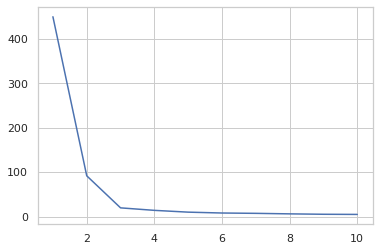

In [174]:
plt.plot(range(1,11), SER)